#Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [2]:
dataset = pd.read_csv('EmploymentSurvey.csv')

##Displaying dataset


In [3]:
dataset.head()

,Timestamp,Email Address,First Name,Last Name,Job Title,Location,Company name,Gender,Age,Level of Education,Industry,Employed,Skills,College
0,1/19/2021 14:46:53,artimishra20@yahoo.com,Arti,Mishra,Web Developer,Mumbai,ABC Company,Female,23.0,Bachelor Degree,IT,Yes,Web Designing,XYZ College name
1,1/19/2021 14:50:02,aarushu569@gmail.com,Gopi,Parmeshwar,Data Analyst,Gujrat,BCd Company,Female,24.0,Bachelor Degree,IT,Yes,Exploratory Data analysis,BCS College
2,1/19/2021 14:59:23,aarti@gmail.com,Suggesh,Mishra,Chartered Accountant,Mumbai,ACC,Male,30.0,Master Degree,Commercial,No,Marketing,Ac College
3,1/19/2021 15:01:40,anu30330@gmail.com,Anu,Mishra,Cashier,Gujrat,xyz company,Female,32.0,Bachelor Degree,Banking,No,Collecting Money,NaN
4,1/19/2021 15:05:15,Ashi@yahoo.com,Ashu,Goyal,Team Manager,Bangalore,Ashi Pvt. Ltd.,Male,26.0,Master Degree,Textile Industry,No,NaN,NaN


#Renaming Columns

In [4]:
dataset.rename(columns = {"Job Title" : "Job_Title"}, inplace = True)

In [5]:
dataset.rename(columns = {"Level of Education" : "Education"}, inplace = True)
dataset.head()

,Timestamp,Email Address,First Name,Last Name,Job_Title,Location,Company name,Gender,Age,Education,Industry,Employed,Skills,College
0,1/19/2021 14:46:53,artimishra20@yahoo.com,Arti,Mishra,Web Developer,Mumbai,ABC Company,Female,23.0,Bachelor Degree,IT,Yes,Web Designing,XYZ College name
1,1/19/2021 14:50:02,aarushu569@gmail.com,Gopi,Parmeshwar,Data Analyst,Gujrat,BCd Company,Female,24.0,Bachelor Degree,IT,Yes,Exploratory Data analysis,BCS College
2,1/19/2021 14:59:23,aarti@gmail.com,Suggesh,Mishra,Chartered Accountant,Mumbai,ACC,Male,30.0,Master Degree,Commercial,No,Marketing,Ac College
3,1/19/2021 15:01:40,anu30330@gmail.com,Anu,Mishra,Cashier,Gujrat,xyz company,Female,32.0,Bachelor Degree,Banking,No,Collecting Money,NaN
4,1/19/2021 15:05:15,Ashi@yahoo.com,Ashu,Goyal,Team Manager,Bangalore,Ashi Pvt. Ltd.,Male,26.0,Master Degree,Textile Industry,No,NaN,NaN


In [6]:
dataset.isnull()

,Timestamp,Email Address,First Name,Last Name,Job_Title,Location,Company name,Gender,Age,Education,Industry,Employed,Skills,College
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,True,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,True,False


#Dropping Columns that are not useful

In [7]:
dataset.drop('Timestamp', axis= 1, inplace= True)

In [8]:
dataset.drop('First Name', axis= 1, inplace= True)

In [9]:
dataset.drop('Last Name', axis= 1, inplace= True)

In [10]:
dataset.drop('Company name', axis = 1, inplace= True)

In [11]:
dataset.head()

,Email Address,Job_Title,Location,Gender,Age,Education,Industry,Employed,Skills,College
0,artimishra20@yahoo.com,Web Developer,Mumbai,Female,23.0,Bachelor Degree,IT,Yes,Web Designing,XYZ College name
1,aarushu569@gmail.com,Data Analyst,Gujrat,Female,24.0,Bachelor Degree,IT,Yes,Exploratory Data analysis,BCS College
2,aarti@gmail.com,Chartered Accountant,Mumbai,Male,30.0,Master Degree,Commercial,No,Marketing,Ac College
3,anu30330@gmail.com,Cashier,Gujrat,Female,32.0,Bachelor Degree,Banking,No,Collecting Money,NaN
4,Ashi@yahoo.com,Team Manager,Bangalore,Male,26.0,Master Degree,Textile Industry,No,NaN,NaN


#Performing Label Encoding on few columns so that we can easily perform Feature Scaling and apply Classification model

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Education'] = le.fit_transform(dataset['Education'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Employed'] = le.fit_transform(dataset['Employed'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Job_Title'] = le.fit_transform(dataset['Job_Title'])

In [15]:
dataset.head()

,Email Address,Job_Title,Location,Gender,Age,Education,Industry,Employed,Skills,College
0,artimishra20@yahoo.com,23,Mumbai,Female,23.0,2,IT,1,Web Designing,XYZ College name
1,aarushu569@gmail.com,5,Gujrat,Female,24.0,1,IT,1,Exploratory Data analysis,BCS College
2,aarti@gmail.com,1,Mumbai,Male,30.0,4,Commercial,0,Marketing,Ac College
3,anu30330@gmail.com,0,Gujrat,Female,32.0,1,Banking,0,Collecting Money,NaN
4,Ashi@yahoo.com,20,Bangalore,Male,26.0,4,Textile Industry,0,NaN,NaN


#Exploratory Data Analysis

##Displaying the NAN values using Heatmap, so we can visualize the nan values that are in the dataset


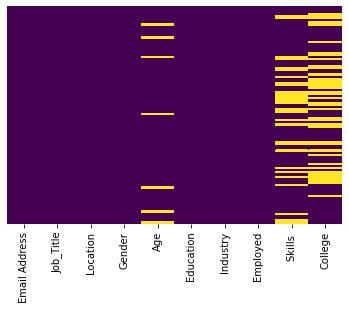

In [16]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

##Dropping College and Skills columns

In [17]:
dataset.drop('College', axis= 1, inplace= True)

In [18]:
dataset.drop('Skills ', axis= 1, inplace= True)

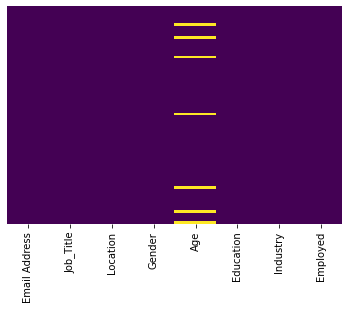

In [19]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Performing boxplot to understand the relation between Education and Age Columns

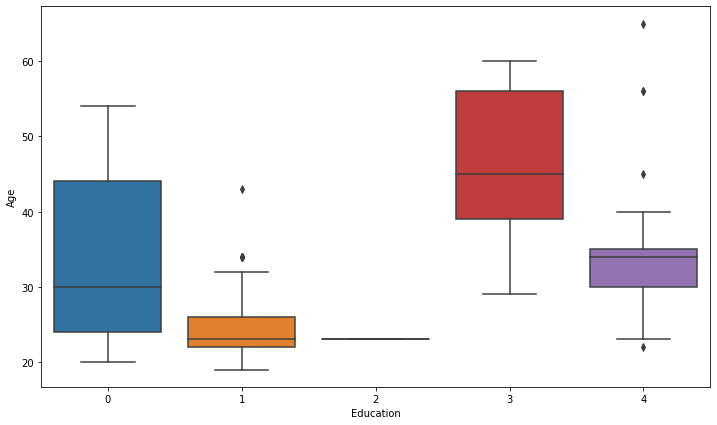

In [20]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Education', y = 'Age', data = dataset)

##Filling the null values in Age column with the average age 

In [21]:
def impute_age(cols):
  Age = cols[0]
  Education = cols[1]

  if pd.isnull(Age):
     if Education == 0:
       return 22

     elif Education == 1:
       return 34

     elif Education == 2:
       return 44  

     else:
       return 27

  else:
     return Age

In [22]:
dataset['Age'] = dataset[['Age', 'Education']].apply(impute_age, axis = 1)

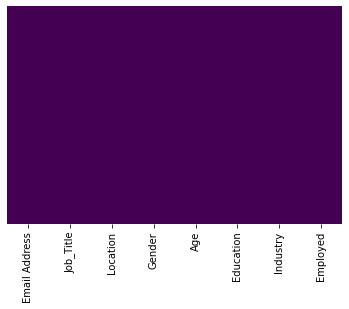

In [23]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Visualising the number of Employed and Unemployed people present in our dataset

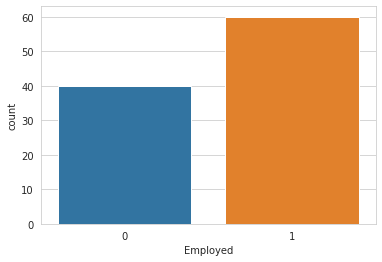

In [24]:
sns.set_style('whitegrid')
sns.countplot(x = 'Employed',  data = dataset)



1.   0 is unemployed
2.   1 is employed

Here we can see that the number of employed people are maximum than the number of unemployed people 



#Visualising the relation between Gender and Employed Columns

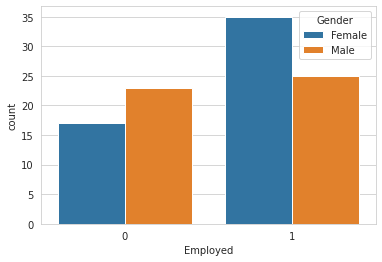

In [25]:
sns.set_style('whitegrid')
sns.countplot(x = 'Employed', hue = 'Gender', data = dataset)

Here we can clearly see that number of employed Females is greater than number of employed Males. Similarly number of unemployed Male is greater than unemployed Female.

#Performing the countplot on Location Column so that we can understand the maximum number of people working in those cities

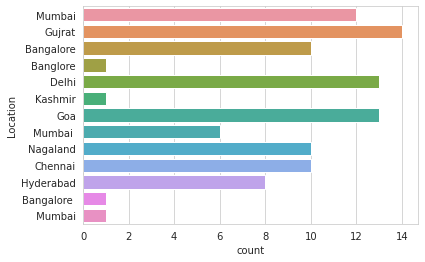

In [26]:
sns.set_style('whitegrid')
sns.countplot(y = 'Location', data = dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


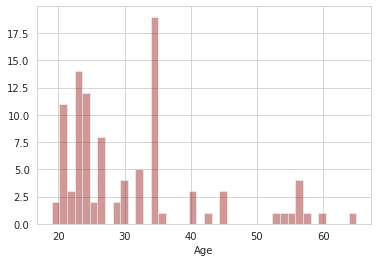

In [27]:
sns.distplot(dataset['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

#Visualising maximum number of employment based on Industry Type using Pie Chart

In [28]:
data = dataset.groupby("Industry")["Employed"].sum()
data

Industry
Banking             12
Commercial          14
Commercial           0
IT                  26
Textile              7
Textile              1
Textile Industry     0
Name: Employed, dtype: int64

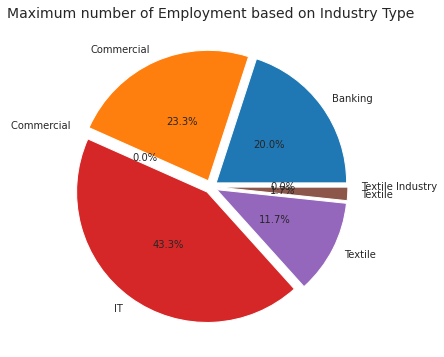

In [29]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5)
plt.title("Maximum number of Employment based on Industry Type", fontsize=14);

From above piechart we can see that maximum number of people work or desire to work in IT Industry followed by Commercial Industry and so on.

#Performing countplot on Location and Industry columns

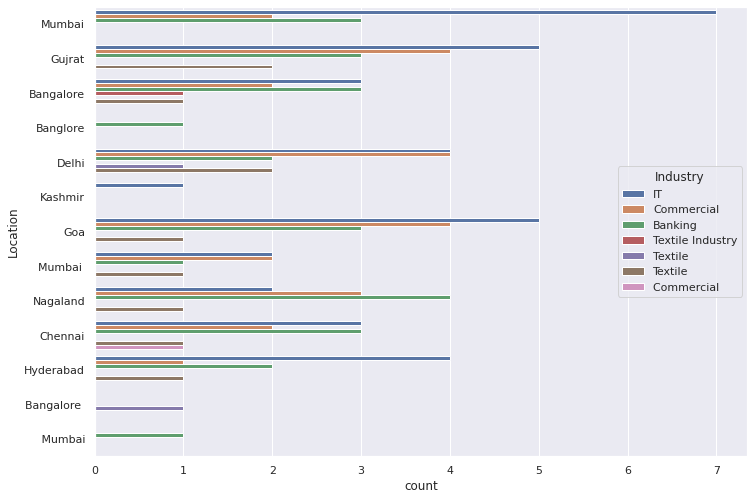

In [30]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y = 'Location', hue = 'Industry', data = dataset)

From above countplot we can see that maximum number of IT Industries are in Mumbai, maximum number of Commercial Industries are in Gujrat, maximum number of Banking Industries are in Nagaland and maximum number of Textile Industries are in Delhi.

#Performing Label Encoding on few columns so that we can easily perform Feature Scaling and apply Classification model

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Location'] = le.fit_transform(dataset['Location'])

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Industry'] = le.fit_transform(dataset['Industry'])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

#Assigning the columns to metrics of feature X and dependent variable Y

In [34]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [35]:
print(y)

[1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1]


#Splitting the dataset into Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the logistic Regression on the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Predicting test set results

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]]


#Making the confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 8  5]
 [ 2 10]]


0.72

Here we can see that we got an accuracy score of 72%

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.67      0.83      0.74        12

    accuracy                           0.72        25
   macro avg       0.73      0.72      0.72        25
weighted avg       0.74      0.72      0.72        25



#Based on the above visualization and after performing Logistic Regression we can clearly see that the employment ratio is higher in India.